exited
0 - Não
1 - Sim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/drive/MyDrive/treino/classificação de rotatividade de clientes/Customer Churn Classification.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_Months,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Credit_Score_Category,Tenure_Group,Loyalty_Score,Exited
0,1,15634602,Hargrave,619,France,Female,42,24,0.00,1,Yes,Yes,101348.88,Good,1-3 years,2,1
1,2,15647311,Hill,608,Spain,Female,41,12,83807.86,1,No,Yes,112542.58,Good,0-1 year,1,0
2,3,15619304,Onio,502,France,Female,42,96,159660.80,3,Yes,No,113931.57,Fair,5+ years,24,1
3,4,15701354,Boni,699,France,Female,39,12,0.00,2,No,No,93826.63,Good,0-1 year,2,0
4,5,15737888,Mitchell,850,Spain,Female,43,24,125510.82,1,Yes,Yes,79084.10,Excellent,1-3 years,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RowNumber              10000 non-null  int64  
 1   CustomerId             10000 non-null  int64  
 2   Surname                10000 non-null  object 
 3   CreditScore            10000 non-null  int64  
 4   Geography              10000 non-null  object 
 5   Gender                 10000 non-null  object 
 6   Age                    10000 non-null  int64  
 7   Tenure_Months          10000 non-null  int64  
 8   Balance                10000 non-null  float64
 9   NumOfProducts          10000 non-null  int64  
 10  HasCrCard              10000 non-null  object 
 11  IsActiveMember         10000 non-null  object 
 12  EstimatedSalary        10000 non-null  float64
 13  Credit_Score_Category  10000 non-null  object 
 14  Tenure_Group           9587 non-null   object 
 15  Loy

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure_Months,Balance,NumOfProducts,EstimatedSalary,Loyalty_Score,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,60.153600,76485.889288,1.530200,100090.239881,7.693200,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,34.706093,62397.405202,0.581654,57510.492818,5.581845,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,36.000000,0.000000,1.000000,51002.110000,4.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,60.000000,97198.540000,1.000000,100193.915000,7.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,84.000000,127644.240000,2.000000,149388.247500,10.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,120.000000,250898.090000,4.000000,199992.480000,40.000000,1.000000


In [5]:
df['Tenure_Group'].isnull().sum()

413

In [6]:
df['Tenure_Group'].mode()

,Tenure_Group
0,5+ years


In [7]:
df['Tenure_Group'].fillna(df['Tenure_Group'].mode()[0], inplace=True)

<ipython-input-7-9cee1598a200>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure_Group'].fillna(df['Tenure_Group'].mode()[0], inplace=True)


In [8]:
credit_score_exited = df[df['Exited'] == 1]['CreditScore']
credit_score_not_exited = df[df['Exited'] == 0]['CreditScore']

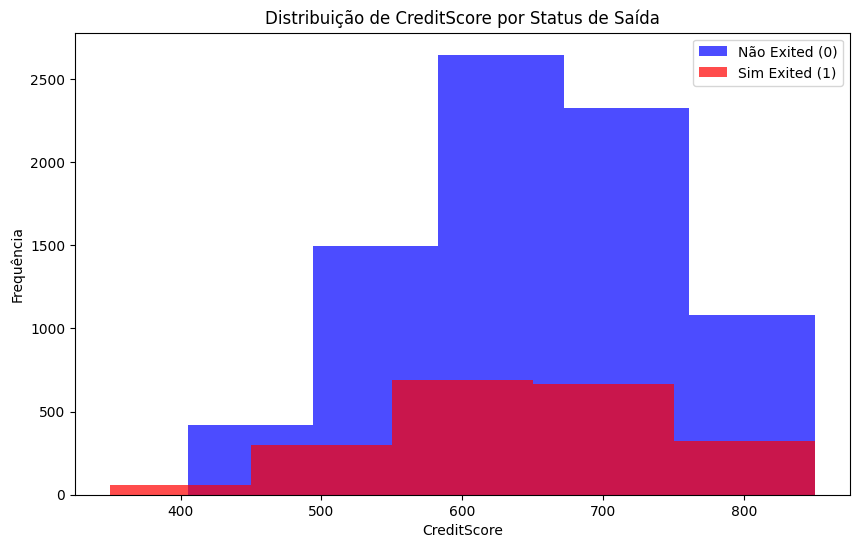

In [9]:
# Configurando o gráfico
plt.figure(figsize=(10, 6))

# Plotando os dados
plt.hist(credit_score_not_exited, bins=5, alpha=0.7, label='Não Exited (0)', color='blue')
plt.hist(credit_score_exited, bins=5, alpha=0.7, label='Sim Exited (1)', color='red')

# Adicionando rótulos e título
plt.xlabel('CreditScore')
plt.ylabel('Frequência')
plt.title('Distribuição de CreditScore por Status de Saída')
plt.legend()

# Exibindo o gráfico
plt.show()

In [10]:
country_exit_data = df.groupby('Geography')['Exited'].sum().reset_index()

In [11]:
fig = px.choropleth(
    country_exit_data,
    locations='Geography',          # Coluna com os nomes dos países
    locationmode='country names',   # Indicando que os locais são identificados por nome
    color='Exited',                 # A cor do mapa será baseada na coluna Exited (quantidade de pessoas que saíram)
    hover_name='Geography',         # Exibir o nome do país ao passar o mouse
    color_continuous_scale='Reds',  # Escala de cores vermelha
    title='Saídas por País'
)

# Exibindo o gráfico
fig.show()

In [12]:
country_exit_data = df.groupby(['Geography', 'Exited']).size().reset_index(name='Count')

fig = px.bar(
    country_exit_data,
    x='Geography',          # Eixo X será o país
    y='Count',              # Eixo Y será a quantidade de pessoas
    color='Exited',         # Diferencia as barras entre saídas (1) e não saídas (0)
    barmode='group',        # As barras serão agrupadas lado a lado
    title='Comparação de Saídas por País',
    labels={'Count': 'Quantidade de Clientes', 'Exited': 'Saiu (0 = Não, 1 = Sim)'}
)

# Exibindo o gráfico
fig.show()

In [13]:
exit_counts = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Calculando a porcentagem de Exited e Não Exited
exit_counts['Total'] = exit_counts.sum(axis=1)
exit_counts['Percent_Exited'] = (exit_counts[1] / exit_counts['Total']) * 100
exit_counts['Percent_Not_Exited'] = (exit_counts[0] / exit_counts['Total']) * 100

In [14]:
exit_counts

Exited,0,1,Total,Percent_Exited,Percent_Not_Exited
Geography,,,,,
France,4204,810,5014,16.154767,83.845233
Germany,1695,814,2509,32.443204,67.556796
Spain,2064,413,2477,16.673395,83.326605


In [15]:
gender_exit_data = df.groupby(['Gender', 'Exited']).size().reset_index(name='Count')

# Criando um gráfico de barras comparando Gender e Exited
fig = px.bar(
    gender_exit_data,
    x='Gender',           # Eixo X será o gênero (masculino ou feminino)
    y='Count',            # Eixo Y será a quantidade de pessoas
    color='Exited',       # Diferencia as barras entre saídas (1) e não saídas (0)
    barmode='group',      # As barras serão agrupadas lado a lado
    title='Comparação de Saídas por Gênero',
    labels={'Count': 'Quantidade de Clientes', 'Exited': 'Saiu (0 = Não, 1 = Sim)'}
)

# Exibindo o gráfico
fig.show()

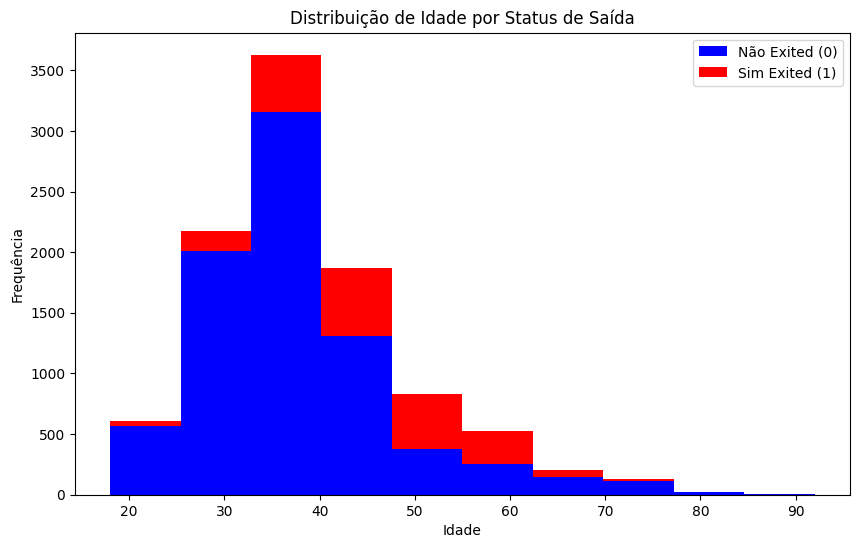

In [16]:
plt.figure(figsize=(10,6))

# Plotagem de histogramas empilhados
plt.hist([df[df['Exited'] == 0]['Age'], df[df['Exited'] == 1]['Age']],
         bins=10, stacked=True, color=['blue', 'red'], label=['Não Exited (0)', 'Sim Exited (1)'])

# Adicionando título e rótulos
plt.title('Distribuição de Idade por Status de Saída')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

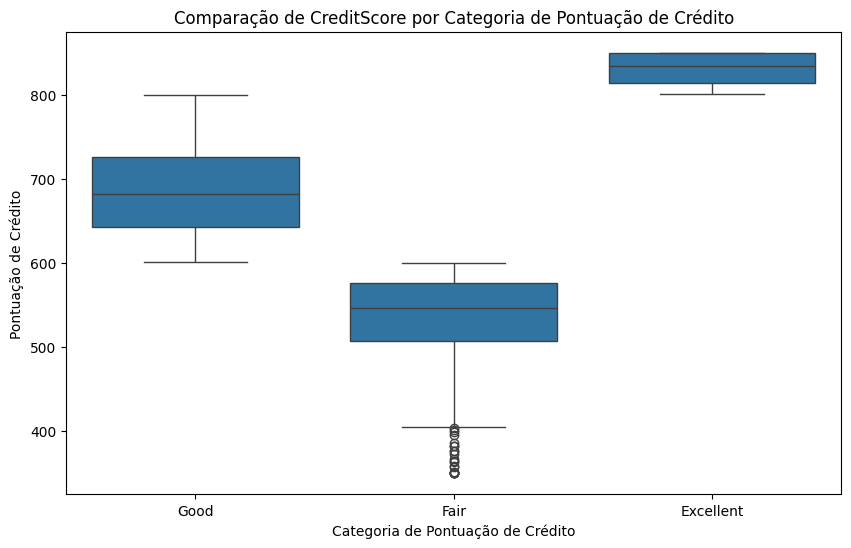

In [17]:
plt.figure(figsize=(10, 6))

# Gráfico do tipo boxplot
sns.boxplot(x='Credit_Score_Category', y='CreditScore', data=df)

# Títulos e legendas
plt.title('Comparação de CreditScore por Categoria de Pontuação de Crédito')
plt.xlabel('Categoria de Pontuação de Crédito')
plt.ylabel('Pontuação de Crédito')

# Mostrar o gráfico
plt.show()

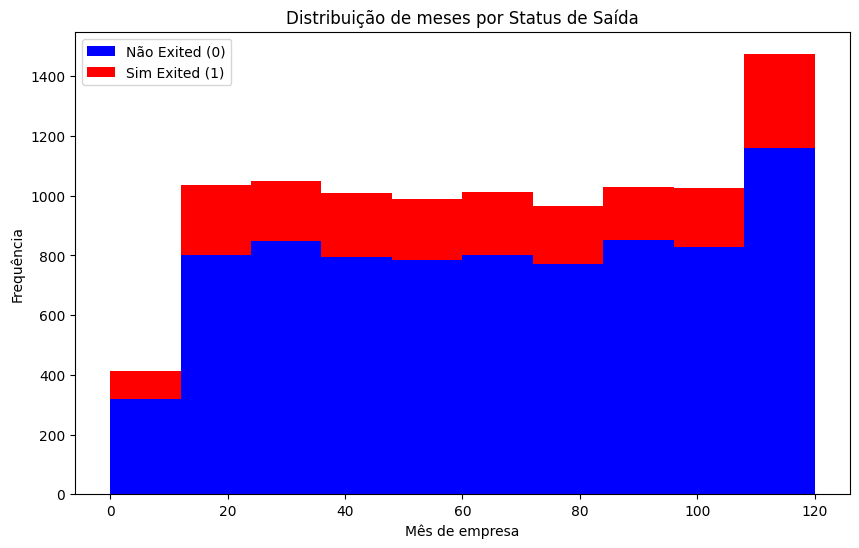

In [18]:
plt.figure(figsize=(10,6))

# Plotagem de histogramas empilhados
plt.hist([df[df['Exited'] == 0]['Tenure_Months'], df[df['Exited'] == 1]['Tenure_Months']],
         bins=10, stacked=True, color=['blue', 'red'], label=['Não Exited (0)', 'Sim Exited (1)'])

# Adicionando título e rótulos
plt.title('Distribuição de meses por Status de Saída')
plt.xlabel('Mês de empresa')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

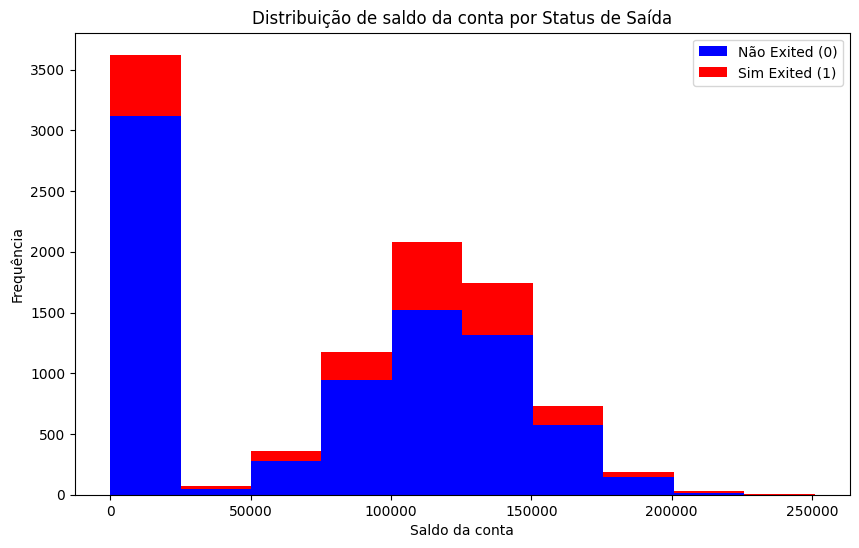

In [19]:
plt.figure(figsize=(10,6))

# Plotagem de histogramas empilhados
plt.hist([df[df['Exited'] == 0]['Balance'], df[df['Exited'] == 1]['Balance']],
         bins=10, stacked=True, color=['blue', 'red'], label=['Não Exited (0)', 'Sim Exited (1)'])

# Adicionando título e rótulos
plt.title('Distribuição de saldo da conta por Status de Saída')
plt.xlabel('Saldo da conta')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

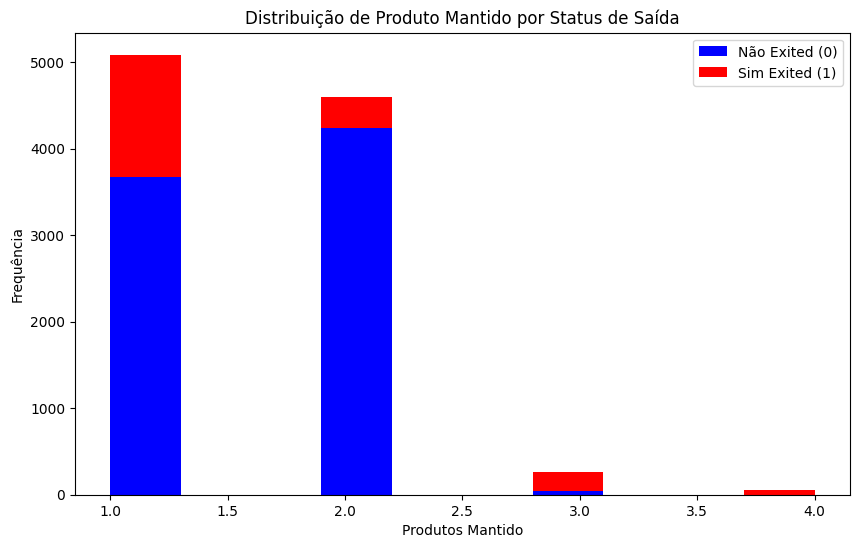

In [20]:
plt.figure(figsize=(10,6))

# Plotagem de histogramas empilhados
plt.hist([df[df['Exited'] == 0]['NumOfProducts'], df[df['Exited'] == 1]['NumOfProducts']],
         bins=10, stacked=True, color=['blue', 'red'], label=['Não Exited (0)', 'Sim Exited (1)'])

# Adicionando título e rótulos
plt.title('Distribuição de Produto Mantido por Status de Saída')
plt.xlabel('Produtos Mantido')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

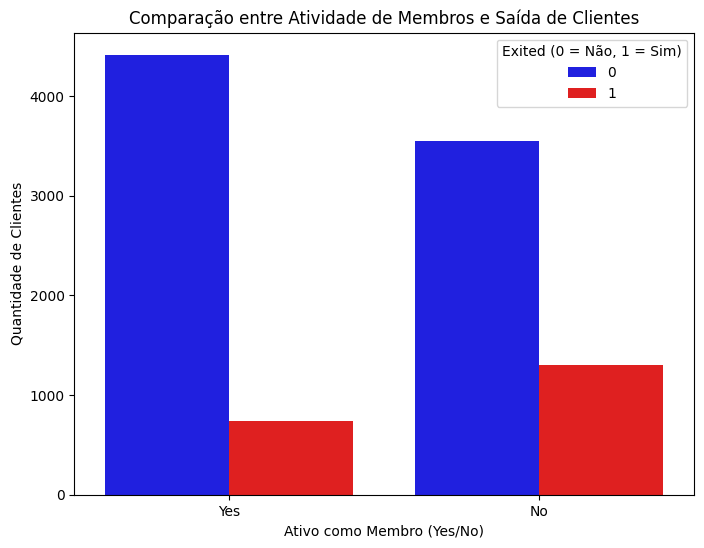

In [21]:
plt.figure(figsize=(8,6))

# Criando gráfico de barras usando Seaborn
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette=['blue', 'red'])

# Adicionando título e rótulos
plt.title('Comparação entre Atividade de Membros e Saída de Clientes')
plt.xlabel('Ativo como Membro (Yes/No)')
plt.ylabel('Quantidade de Clientes')

# Exibindo o gráfico
plt.legend(title='Exited (0 = Não, 1 = Sim)')
plt.show()

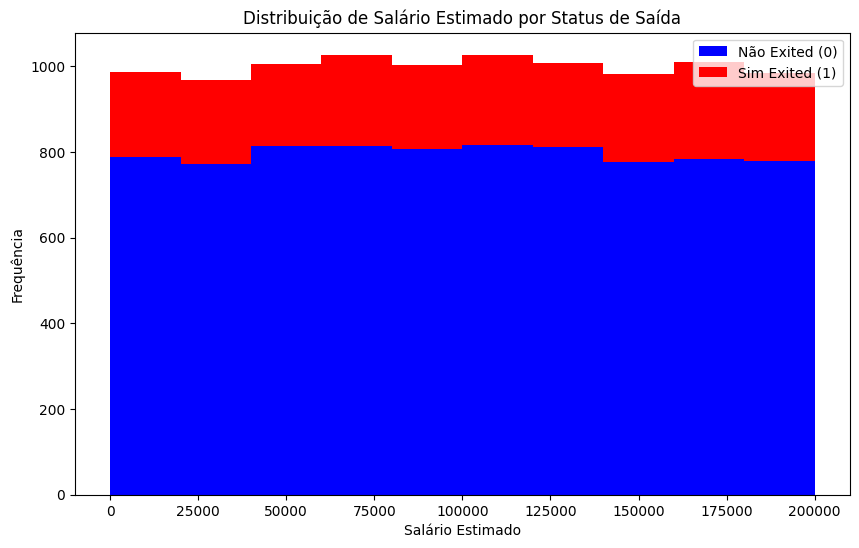

In [22]:
plt.figure(figsize=(10,6))

# Plotagem de histogramas empilhados
plt.hist([df[df['Exited'] == 0]['EstimatedSalary'], df[df['Exited'] == 1]['EstimatedSalary']],
         bins=10, stacked=True, color=['blue', 'red'], label=['Não Exited (0)', 'Sim Exited (1)'])

# Adicionando título e rótulos
plt.title('Distribuição de Salário Estimado por Status de Saída')
plt.xlabel('Salário Estimado')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

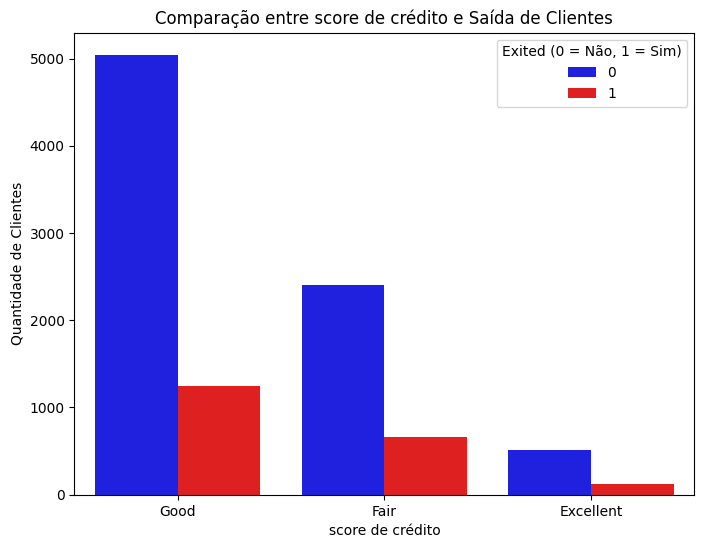

In [23]:
plt.figure(figsize=(8,6))

# Criando gráfico de barras usando Seaborn
sns.countplot(x='Credit_Score_Category', hue='Exited', data=df, palette=['blue', 'red'])

# Adicionando título e rótulos
plt.title('Comparação entre score de crédito e Saída de Clientes')
plt.xlabel('score de crédito')
plt.ylabel('Quantidade de Clientes')

# Exibindo o gráfico
plt.legend(title='Exited (0 = Não, 1 = Sim)')
plt.show()

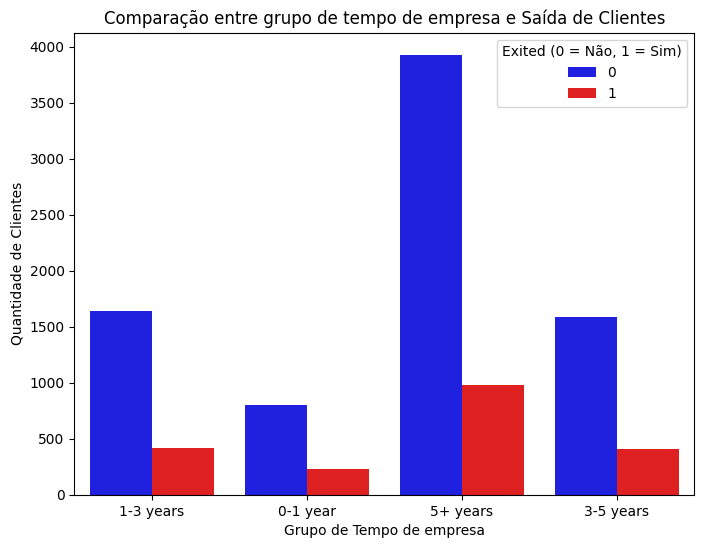

In [24]:
plt.figure(figsize=(8,6))

# Criando gráfico de barras usando Seaborn
sns.countplot(x='Tenure_Group', hue='Exited', data=df, palette=['blue', 'red'])

# Adicionando título e rótulos
plt.title('Comparação entre grupo de tempo de empresa e Saída de Clientes')
plt.xlabel('Grupo de Tempo de empresa')
plt.ylabel('Quantidade de Clientes')

# Exibindo o gráfico
plt.legend(title='Exited (0 = Não, 1 = Sim)')
plt.show()

In [25]:
categorical_columns = df.select_dtypes(include=['object']).drop('Surname', axis=1)
categorical_columns

,Geography,Gender,HasCrCard,IsActiveMember,Credit_Score_Category,Tenure_Group
0,France,Female,Yes,Yes,Good,1-3 years
1,Spain,Female,No,Yes,Good,0-1 year
2,France,Female,Yes,No,Fair,5+ years
3,France,Female,No,No,Good,0-1 year
4,Spain,Female,Yes,Yes,Excellent,1-3 years
...,...,...,...,...,...,...
9995,France,Male,Yes,No,Good,3-5 years
9996,France,Male,Yes,Yes,Fair,5+ years
9997,France,Female,No,Yes,Good,5+ years
9998,Germany,Male,Yes,No,Good,1-3 years


In [26]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).drop(['RowNumber', 'CustomerId'], axis=1)
numeric_columns

,CreditScore,Age,Tenure_Months,Balance,NumOfProducts,EstimatedSalary,Loyalty_Score,Exited
0,619,42,24,0.00,1,101348.88,2,1
1,608,41,12,83807.86,1,112542.58,1,0
2,502,42,96,159660.80,3,113931.57,24,1
3,699,39,12,0.00,2,93826.63,2,0
4,850,43,24,125510.82,1,79084.10,2,0
...,...,...,...,...,...,...,...,...
9995,771,39,60,0.00,2,96270.64,10,0
9996,516,35,120,57369.61,1,101699.77,10,0
9997,709,36,84,0.00,1,42085.58,7,1
9998,772,42,36,75075.31,2,92888.52,6,1


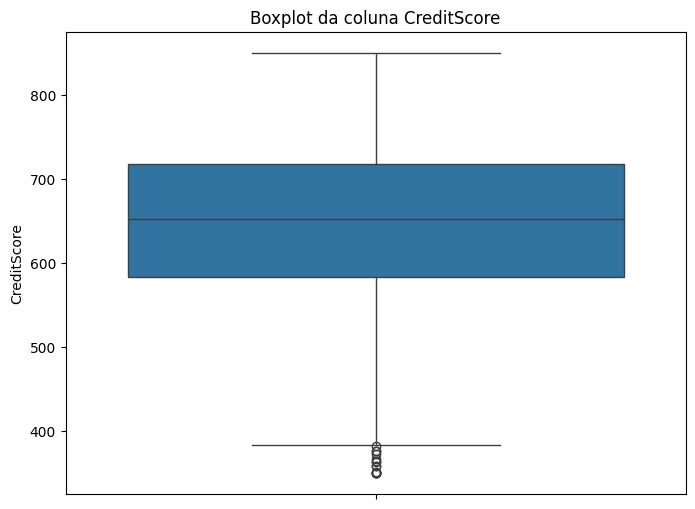

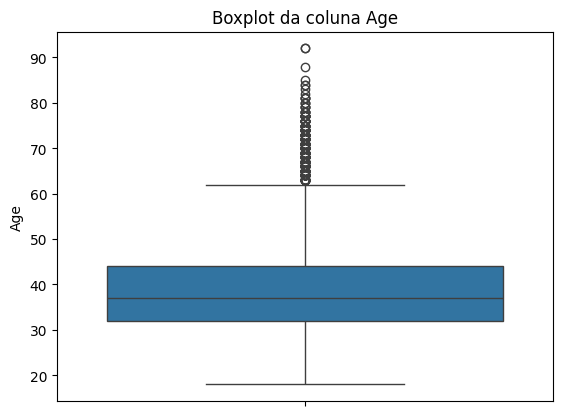

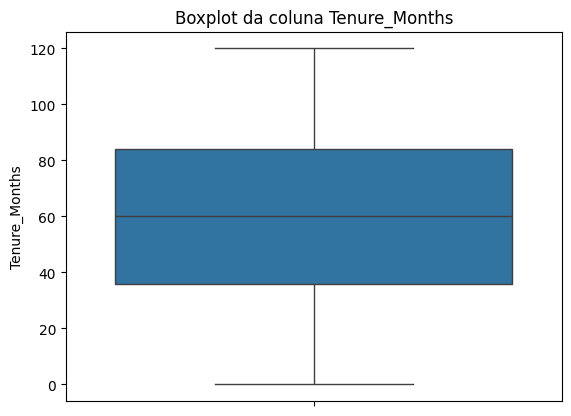

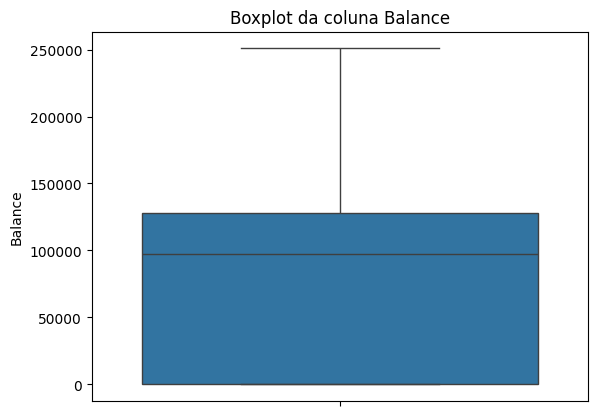

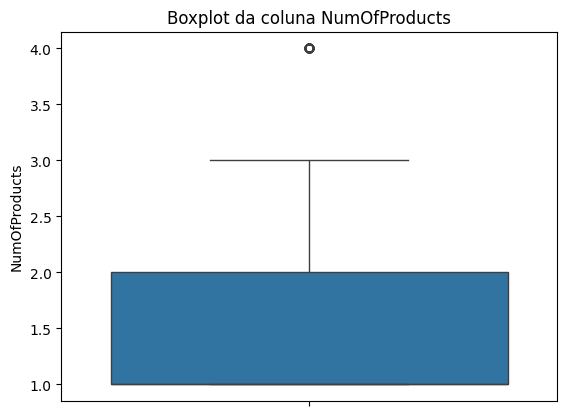

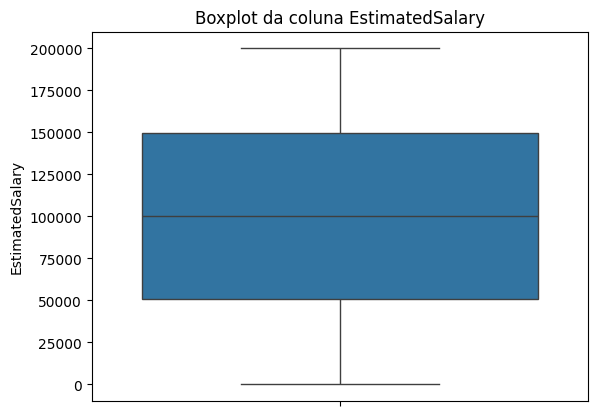

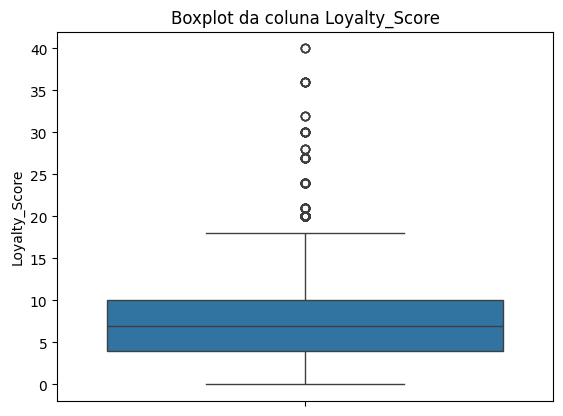

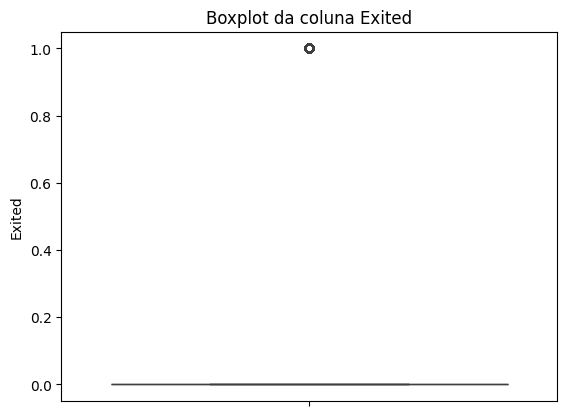

In [27]:
numeric_columns_list = ['CreditScore', 'Age', 'Tenure_Months', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Loyalty_Score', 'Exited']

# Configuração do gráfico
plt.figure(figsize=(8, 6))

for column in numeric_columns_list:
  sns.boxplot(data=numeric_columns[column])
  plt.title(f'Boxplot da coluna {column}')
  plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [29]:
label_encoder = LabelEncoder()

In [30]:
hot_encoder = OneHotEncoder()

In [31]:
for coluna in categorical_columns.columns:
  categorical_columns[f'{coluna}_num'] = label_encoder.fit_transform(categorical_columns[coluna])

categorical_columns.head()

,Geography,Gender,HasCrCard,IsActiveMember,Credit_Score_Category,Tenure_Group,Geography_num,Gender_num,HasCrCard_num,IsActiveMember_num,Credit_Score_Category_num,Tenure_Group_num
0,France,Female,Yes,Yes,Good,1-3 years,0,0,1,1,2,1
1,Spain,Female,No,Yes,Good,0-1 year,2,0,0,1,2,0
2,France,Female,Yes,No,Fair,5+ years,0,0,1,0,1,3
3,France,Female,No,No,Good,0-1 year,0,0,0,0,2,0
4,Spain,Female,Yes,Yes,Excellent,1-3 years,2,0,1,1,0,1


In [32]:
categorical_columns1 = df.select_dtypes(include=['object']).drop('Surname', axis=1)
categorical_columns1

,Geography,Gender,HasCrCard,IsActiveMember,Credit_Score_Category,Tenure_Group
0,France,Female,Yes,Yes,Good,1-3 years
1,Spain,Female,No,Yes,Good,0-1 year
2,France,Female,Yes,No,Fair,5+ years
3,France,Female,No,No,Good,0-1 year
4,Spain,Female,Yes,Yes,Excellent,1-3 years
...,...,...,...,...,...,...
9995,France,Male,Yes,No,Good,3-5 years
9996,France,Male,Yes,Yes,Fair,5+ years
9997,France,Female,No,Yes,Good,5+ years
9998,Germany,Male,Yes,No,Good,1-3 years


In [33]:
geography = pd.DataFrame(hot_encoder.fit_transform(categorical_columns1[['Geography']]).toarray(), columns=hot_encoder.get_feature_names_out(['Geography']))

In [34]:
gender = pd.DataFrame(hot_encoder.fit_transform(categorical_columns1[['Gender']]).toarray(), columns=hot_encoder.get_feature_names_out(['Gender']))

In [35]:
hasCrCard = pd.DataFrame(hot_encoder.fit_transform(categorical_columns1[['HasCrCard']]).toarray(), columns=hot_encoder.get_feature_names_out(['HasCrCard']))

In [36]:
isActiveMember = pd.DataFrame(hot_encoder.fit_transform(categorical_columns1[['IsActiveMember']]).toarray(), columns=hot_encoder.get_feature_names_out(['IsActiveMember']))

In [37]:
credit_Score_Category = pd.DataFrame(hot_encoder.fit_transform(categorical_columns1[['Credit_Score_Category']]).toarray(), columns=hot_encoder.get_feature_names_out(['Credit_Score_Category']))

In [38]:
tenure_Group = pd.DataFrame(hot_encoder.fit_transform(categorical_columns1[['Tenure_Group']]).toarray(), columns=hot_encoder.get_feature_names_out(['Tenure_Group']))

In [39]:
list_dataframe = [numeric_columns, categorical_columns, gender, hasCrCard, isActiveMember, credit_Score_Category, tenure_Group]

In [40]:
result = pd.concat(list_dataframe, axis=1)
result

,CreditScore,Age,Tenure_Months,Balance,NumOfProducts,EstimatedSalary,Loyalty_Score,Exited,Geography,Gender,...,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes,Credit_Score_Category_Excellent,Credit_Score_Category_Fair,Credit_Score_Category_Good,Tenure_Group_0-1 year,Tenure_Group_1-3 years,Tenure_Group_3-5 years,Tenure_Group_5+ years
0,619,42,24,0.00,1,101348.88,2,1,France,Female,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,608,41,12,83807.86,1,112542.58,1,0,Spain,Female,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,502,42,96,159660.80,3,113931.57,24,1,France,Female,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,699,39,12,0.00,2,93826.63,2,0,France,Female,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,850,43,24,125510.82,1,79084.10,2,0,Spain,Female,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,60,0.00,2,96270.64,10,0,France,Male,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,516,35,120,57369.61,1,101699.77,10,0,France,Male,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9997,709,36,84,0.00,1,42085.58,7,1,France,Female,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,772,42,36,75075.31,2,92888.52,6,1,Germany,Male,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [41]:
list_hot_encoder = ['CreditScore', 'Age', 'Tenure_Months', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Loyalty_Score', 'Exited', 'Gender_Female',
       'Gender_Male', 'HasCrCard_No', 'HasCrCard_Yes', 'IsActiveMember_No',
       'IsActiveMember_Yes', 'Credit_Score_Category_Excellent',
       'Credit_Score_Category_Fair', 'Credit_Score_Category_Good',
       'Tenure_Group_0-1 year', 'Tenure_Group_1-3 years',
       'Tenure_Group_3-5 years', 'Tenure_Group_5+ years']

In [42]:
list_label_encoder = ['CreditScore', 'Age', 'Tenure_Months', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Loyalty_Score', 'Exited', 'Geography_num', 'Gender_num', 'HasCrCard_num', 'IsActiveMember_num',
       'Credit_Score_Category_num', 'Tenure_Group_num']

In [43]:
list_numeric = ['CreditScore', 'Age', 'Tenure_Months', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Loyalty_Score', 'Exited']

In [44]:
result.to_csv('dados_tratados.csv', index=False)

In [52]:
categorical_columns.head()

,Geography,Gender,HasCrCard,IsActiveMember,Credit_Score_Category,Tenure_Group,Geography_num,Gender_num,HasCrCard_num,IsActiveMember_num,Credit_Score_Category_num,Tenure_Group_num
0,France,Female,Yes,Yes,Good,1-3 years,0,0,1,1,2,1
1,Spain,Female,No,Yes,Good,0-1 year,2,0,0,1,2,0
2,France,Female,Yes,No,Fair,5+ years,0,0,1,0,1,3
3,France,Female,No,No,Good,0-1 year,0,0,0,0,2,0
4,Spain,Female,Yes,Yes,Excellent,1-3 years,2,0,1,1,0,1


In [65]:
categorical_columns[['Tenure_Group', 'Tenure_Group_num']].value_counts()

,,count
Tenure_Group,Tenure_Group_num,
5+ years,3,4907
1-3 years,1,2057
3-5 years,2,2001
0-1 year,0,1035


In [66]:
categorical_columns['Tenure_Group'].unique()

array(['1-3 years', '0-1 year', '5+ years', '3-5 years'], dtype=object)

# Relatório de Rotatividade de Clientes

- **Clientes com pontuação mais baixa** tendem a deixar a empresa.
- **Clientes com pontuação mais alta** têm maior probabilidade de permanecer, mas ainda há uma quantidade significativa que opta por sair.
- A **taxa de desistência entre clientes espanhóis e franceses** é de aproximadamente 16%, enquanto entre os **clientes alemães** esse percentual chega a cerca de 32%.
- **Clientes do gênero masculino** são maioria. Embora a probabilidade de retenção seja alta para ambos os gêneros, **masculinos e femininos** apresentam praticamente a mesma chance de sair.
- **Clientes entre 20 e 50 anos** tendem a permanecer, enquanto aqueles entre **50 e 60 anos** têm uma tendência maior de deixar a empresa.
- O tempo de vínculo com a empresa não parece influenciar significativamente a rotatividade, uma vez que a maioria dos clientes permanece independente de sua **duração de contrato**.
- **Clientes que possuem mais de três produtos** tendem a apresentar uma maior probabilidade de cancelamento de serviço.

